# Table of Contents
#### 1. Importing libraries and data
#### 2. Data cleaning
#### 3. Data prep for regression analysis
#### 4. Regression analysis

#### 1. Importing libraries and data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import os
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
#importing data
path = r'C:\Users\Goce\Desktop\11-2023 World Happiness Report 2015-2023'

In [3]:
# Importing Data
df = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'df.csv'), index_col = False)

In [4]:
df.head(3)

,Unnamed: 0,country,region,happiness_score,gdp_per_capita,social_support,healthy_life_expectancy,freedom_to_make_life_choices,generosity,perceptions_of_corruption,year,happiness_rank
0,0,Switzerland,Western Europe,7.587,1.39651,1.34951,0.94143,0.66557,0.29678,0.41978,2015,High Happiness
1,1,Iceland,Western Europe,7.561,1.30232,1.40223,0.94784,0.62877,0.43630,0.14145,2015,High Happiness
2,2,Denmark,Western Europe,7.527,1.32548,1.36058,0.87464,0.64938,0.34139,0.48357,2015,High Happiness


#### 2. Data cleaning

In [5]:
#dropping unnecessary columns
df.drop(columns = ["Unnamed: 0"], inplace = True)

In [6]:
# Check for missing values

df.isnull().sum()

# No missing values to handle

country                         0
region                          0
happiness_score                 0
gdp_per_capita                  0
social_support                  0
healthy_life_expectancy         0
freedom_to_make_life_choices    0
generosity                      0
perceptions_of_corruption       0
year                            0
happiness_rank                  0
dtype: int64

In [7]:
dups = df.duplicated()

In [8]:
dups.shape # no dups

(1367,)

In [9]:
df.columns

Index(['country', 'region', 'happiness_score', 'gdp_per_capita',
       'social_support', 'healthy_life_expectancy',
       'freedom_to_make_life_choices', 'generosity',
       'perceptions_of_corruption', 'year', 'happiness_rank'],
      dtype='object')

C:\Users\Goce\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='happiness_score', ylabel='Density'>

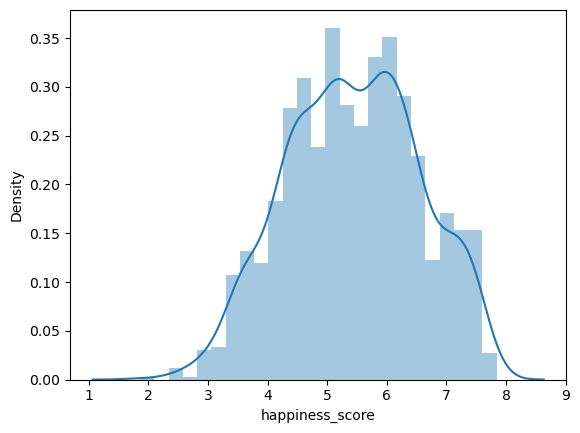

In [13]:
#Extreme values checks
sns.distplot(df['happiness_score'], bins=25) # no extreme values

#### 3. Data prep for regression analysis

Explore data visually

In [11]:
# Keep only the variables to use in the pair plot

sub = df[['happiness_score', 'gdp_per_capita', 'social_support', 'healthy_life_expectancy','freedom_to_make_life_choices', 'generosity', 'perceptions_of_corruption']]

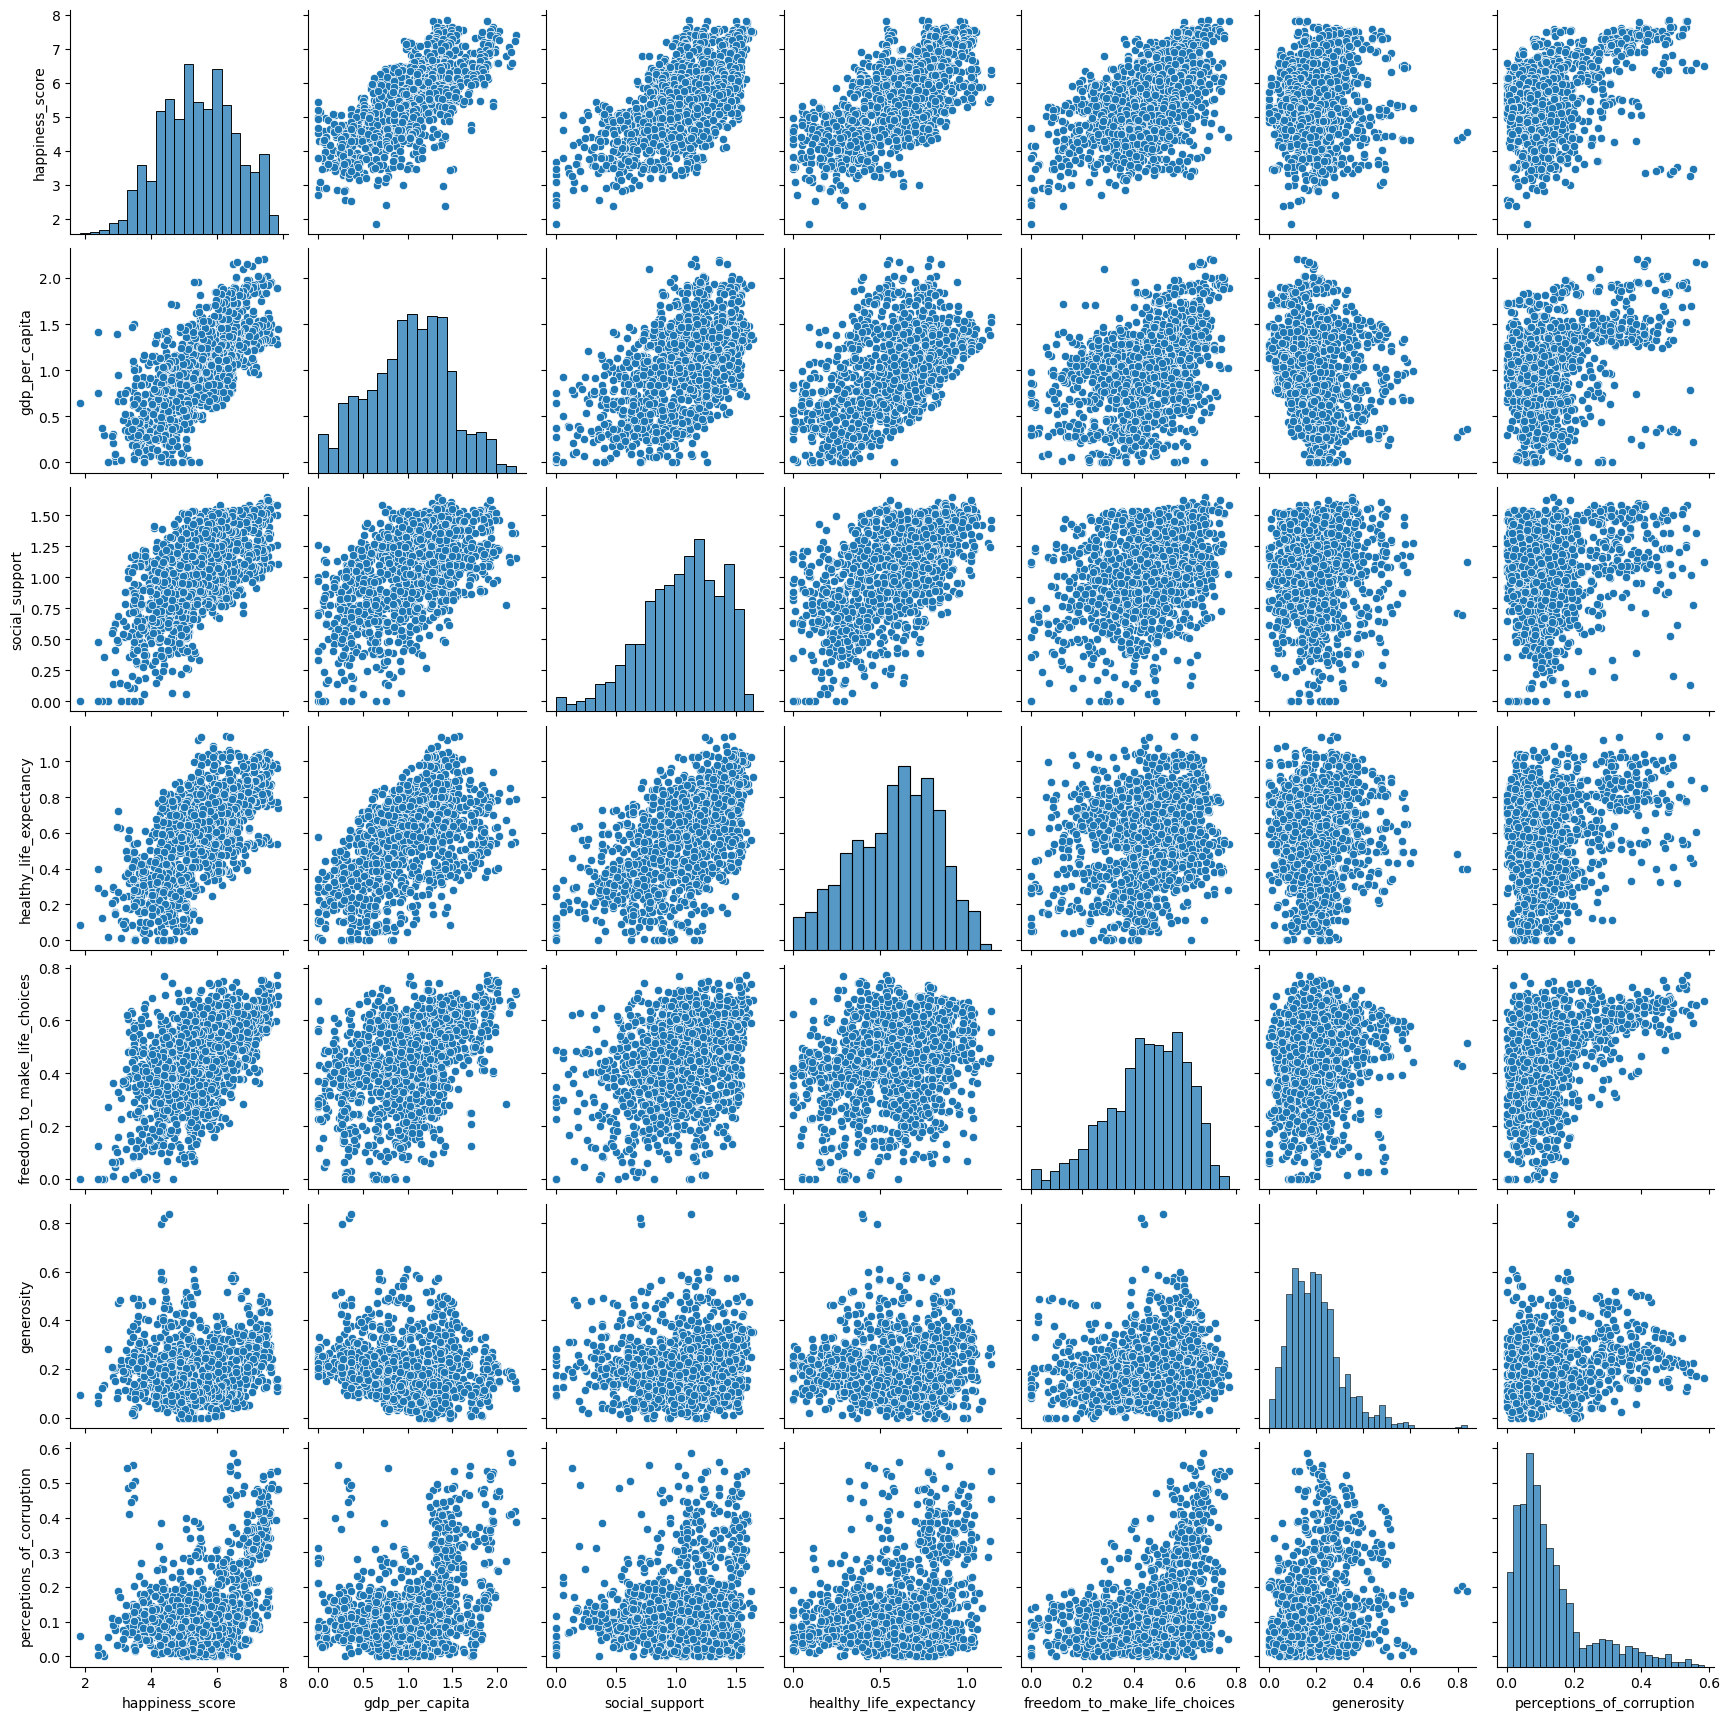

In [12]:
# Create a pair plot 

g = sns.pairplot(sub)

Hypothesis to be checked:
- Null Hypothesis (H0):
There is no significant linear relationship between the happiness score of countries and their GDP per capita.

- Alternative Hypothesis (H1):
There is a significant linear relationship between the happiness score of countries and their GDP per capita.

In [14]:
# Reshape the variables into NumPy arrays and put them into separate objects.

X = df['gdp_per_capita'].values.reshape(-1,1)
y = df['happiness_score'].values.reshape(-1,1)

In [15]:
X

array([[1.39651],
       [1.30232],
       [1.32548],
       ...,
       [0.67   ],
       [1.417  ],
       [0.645  ]])

In [16]:
y

array([[7.587],
       [7.561],
       [7.527],
       ...,
       [3.138],
       [2.392],
       [1.859]])

In [17]:
# Split data into a training set and a test set.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

### 4. Regression analysis

In [18]:
# Create a regression object.

regression = LinearRegression()  # This is the regression object, which will be fit onto the training set.

In [19]:
# Fit the regression object onto the training set.

regression.fit(X_train, y_train)

LinearRegression()

In [20]:
# Predict the values of y using X.

y_predicted = regression.predict(X_test)

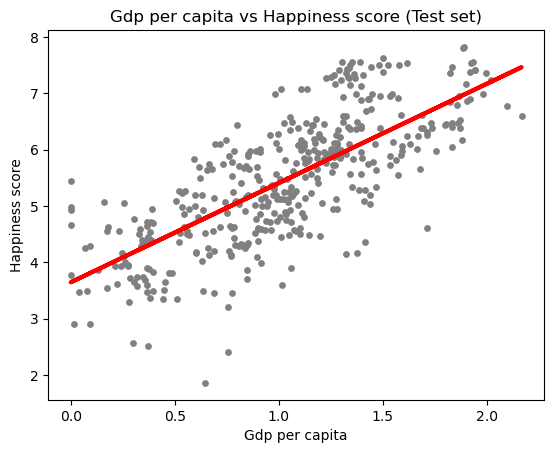

In [21]:
# Create a plot that shows the regression line from the model on the test set.

plot_test = plt
plot_test.scatter(X_test, y_test, color='gray', s = 15)
plot_test.plot(X_test, y_predicted, color='red', linewidth =3)
plot_test.title('Gdp per capita vs Happiness score (Test set)')
plot_test.xlabel('Gdp per capita')
plot_test.ylabel('Happiness score')
plot_test.show()

The regression line appears to generally follow the trend of the data points, indicating a positive correlation between GDP per capita and Happiness score. This suggests that as GDP per capita increases, the Happiness score also tends to increase. However, there are some outliers that the line does not account for, indicating that while GDP per capita may be a significant factor in determining happiness, it is not the only factor.

In [22]:
# Create objects that contain the model summary statistics.

rmse = mean_squared_error(y_test, y_predicted) # This is the mean squared error
r2 = r2_score(y_test, y_predicted) # This is the R2 score. 

In [23]:
# Print the model summary statistics. 

print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[1.76086535]]
Mean squared error:  0.5794177985201602
R2 score:  0.5575536374315844


In [24]:
y_predicted

array([[5.86304424],
       [4.29587408],
       [5.14637204],
       [5.51379421],
       [5.51129378],
       [5.28701236],
       [6.25154928],
       [5.01254628],
       [3.87802073],
       [6.62902066],
       [3.77817967],
       [6.87378095],
       [6.08139154],
       [4.20751386],
       [4.12875035],
       [4.28703454],
       [4.3443507 ],
       [5.89778611],
       [4.94804578],
       [5.4228279 ],
       [5.21017262],
       [3.71667631],
       [6.85441143],
       [5.01606801],
       [5.49678425],
       [4.0916137 ],
       [5.22559482],
       [6.5814773 ],
       [5.52298592],
       [5.94959077],
       [5.84719645],
       [4.70398121],
       [7.069237  ],
       [5.66582732],
       [5.49502338],
       [6.00039174],
       [5.03288   ],
       [5.473893  ],
       [5.88769635],
       [4.56470539],
       [5.63073348],
       [4.29342694],
       [5.84793601],
       [6.03821512],
       [6.29259789],
       [4.98789416],
       [5.73094412],
       [6.104

In [25]:
# Create a dataframe comparing the actual and predicted values of y.

data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(30)

,Actual,Predicted
0,4.9480,5.863044
1,2.5230,4.295874
2,4.3400,5.146372
3,6.4850,5.513794
4,3.8960,5.511294
5,4.5740,5.287012
6,7.5040,6.251549
7,4.6030,5.012546
8,3.8560,3.878021
9,6.3770,6.629021


Interperetation of the summary statistics:
- Slope: POsitive relationship. The slope of 1.76 indicates that, on average, for every one unit increase in the independent variable (GDP per capita), the dependent variable (happiness score) is expected to increase by approximately 1.76 units.
- The mean squared error (MSE) of 0.58 represents the average squared difference between the predicted happiness scores and the actual happiness scores in the test set. A lower MSE suggests better model performance.
- The R2 score of 0.56 (55.76%) indicates that the model explains about 55.76% of the variance in the happiness scores. In other words, the model captures more than half of the variability in happiness scores, which is a moderately good fit.